In [366]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration
### Twitter data

In [367]:
db = sqlite3.connect('../vart.db')
c = db.cursor()

In [368]:
query = "SELECT * FROM vart_1h"
data = pd.read_sql_query(query,db)
data['date'] = pd.to_datetime(data['date'])
data.sort_values(by=['date','tag'], inplace=True)
data[data.columns[2:]] = data[data.columns[2:]].apply(pd.to_numeric, errors='coerce')
data.head()

,tag,date,f1,f10,f11,f12,f13,f2,f3,f4,f5,f6,f7,f8,f9
663,btc,2018-03-23 14:00:00,3602,372,2161,706,952,809,653,1638,1081,566,89,2071,1069
664,eth,2018-03-23 14:00:00,1742,89,1228,246,643,541,335,828,680,427,49,1226,425
665,ltc,2018-03-23 14:00:00,379,16,244,45,134,56,36,149,95,31,7,212,119
666,btc,2018-03-23 15:00:00,3603,392,2173,667,997,864,636,1637,1061,530,84,2202,1038
667,eth,2018-03-23 15:00:00,1732,80,1263,211,626,592,353,763,615,455,64,1273,389


In [369]:
data.dtypes

tag             object
date    datetime64[ns]
f1               int64
f10              int64
f11              int64
f12              int64
f13              int64
f2               int64
f3               int64
f4               int64
f5               int64
f6               int64
f7               int64
f8               int64
f9               int64
dtype: object

In [370]:
twitter_btc = data[data['tag']=='btc']
twitter_btc.set_index('date', inplace=True) 
twitter_eth = data[data['tag']=='eth']
twitter_eth.set_index('date', inplace=True)
twitter_ltc = data[data['tag']=='ltc']
twitter_ltc.set_index('date', inplace=True)
twitter_btc.head()

,tag,f1,f10,f11,f12,f13,f2,f3,f4,f5,f6,f7,f8,f9
date,,,,,,,,,,,,,,
2018-03-23 14:00:00,btc,3602,372,2161,706,952,809,653,1638,1081,566,89,2071,1069
2018-03-23 15:00:00,btc,3603,392,2173,667,997,864,636,1637,1061,530,84,2202,1038
2018-03-23 16:00:00,btc,3345,335,2026,615,920,790,537,1432,989,517,78,2065,984
2018-03-23 17:00:00,btc,3323,403,2035,585,913,807,542,1492,968,544,104,2083,885
2018-03-23 18:00:00,btc,3282,365,2023,548,913,664,565,1439,886,443,67,2016,894


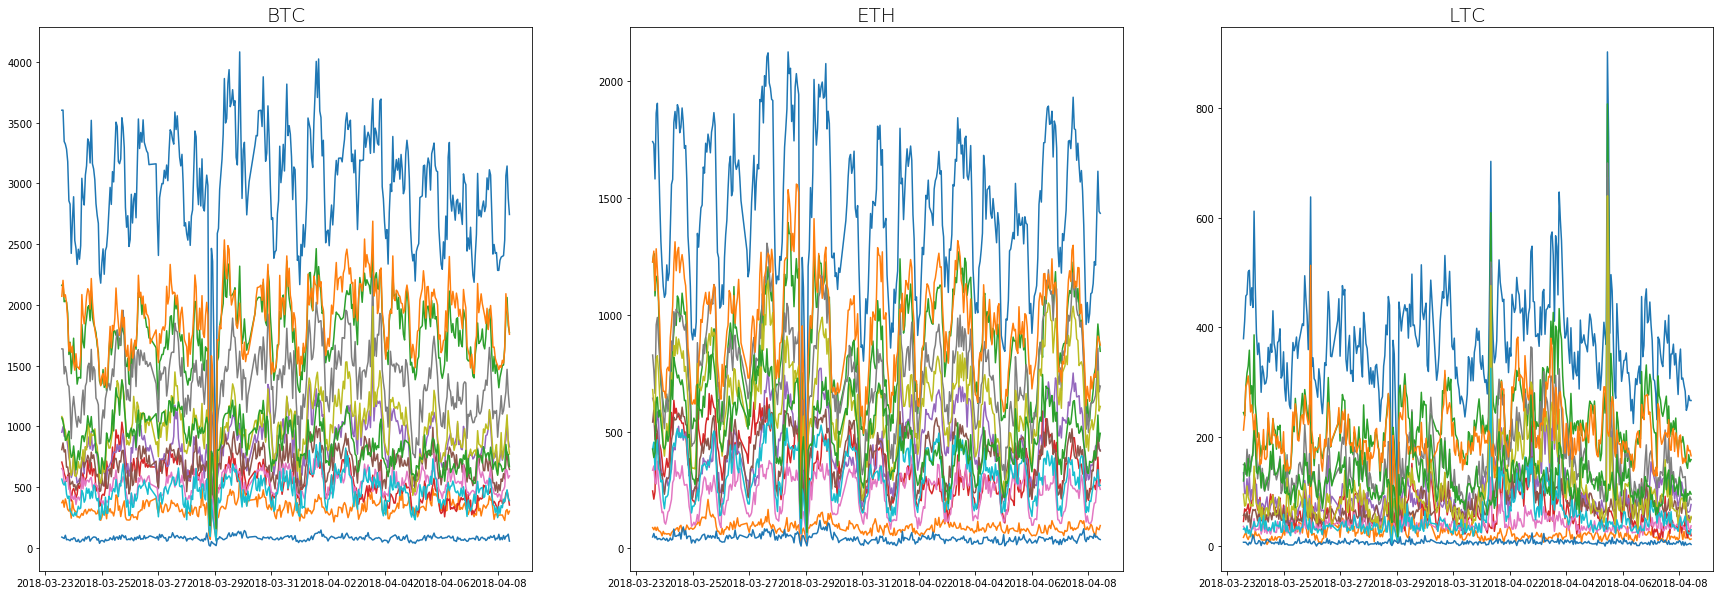

In [371]:
fig = plt.figure(figsize=(30,10))

title_font = {
    'fontsize': 20,
    'fontweight' : 10,
    'verticalalignment': 'baseline'
}

ax1 = fig.add_subplot(131)
for col in data.columns[2:]:
    ax1.plot(col, data=twitter_btc)
ax1.set_title('BTC', fontdict=title_font)

ax2 = fig.add_subplot(132)
for col in data.columns[2:]:
    ax2.plot(col, data=twitter_eth)
ax2.set_title('ETH',fontdict=title_font)

ax3 = fig.add_subplot(133)
for col in data.columns[2:]:
    ax3.plot(col,data=twitter_ltc)
ax3.set_title('LTC',fontdict=title_font)

plt.show()

Obvioulsy features are very correlated between each other, because they are all counts of elements from the same group. For this reason it looks reasonable to divide them by the total volume of tweets of the same time slot (i.e `f1`).

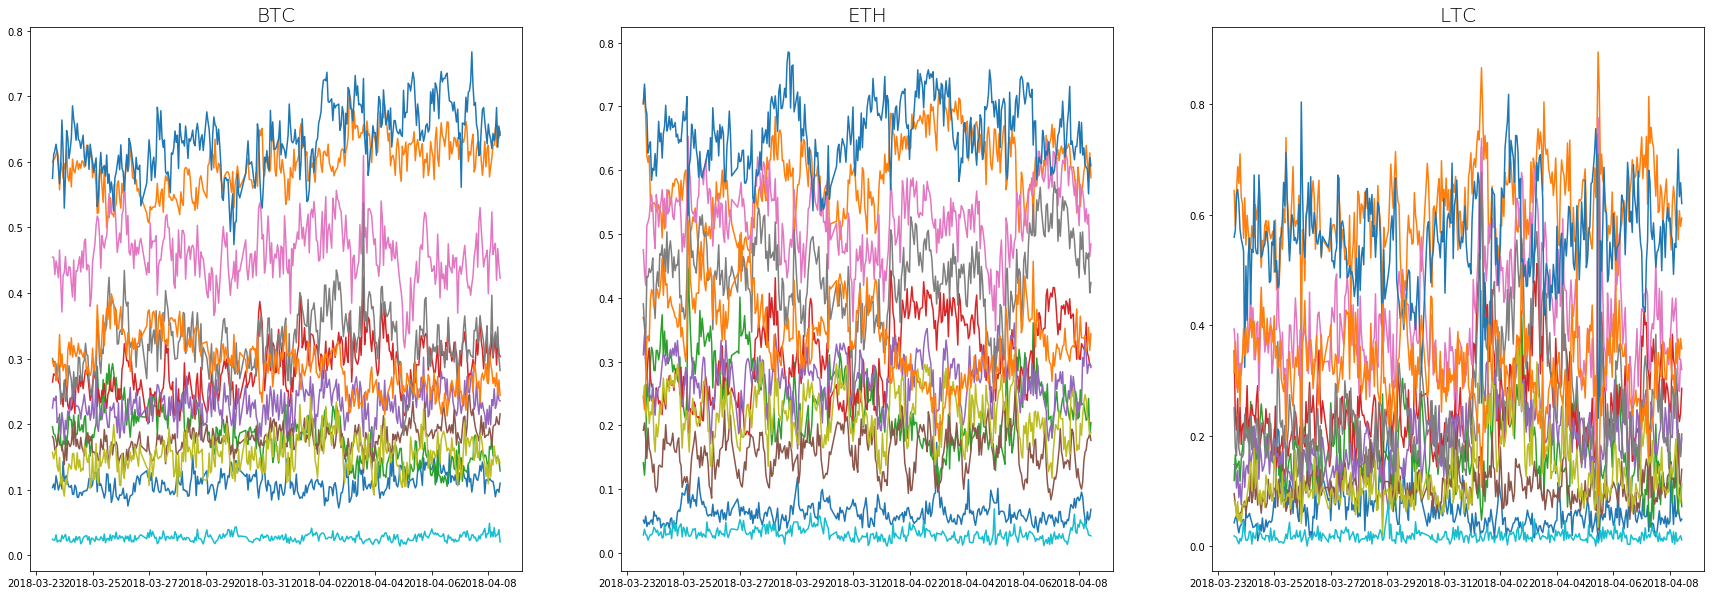

In [372]:
tmp_data = twitter_btc.iloc[:,2:]
tmp_data = tmp_data.divide(twitter_btc['f1'], axis=0)
tmp_data['f1'] = twitter_btc['f1']
tdiv_btc = tmp_data

tmp_data = twitter_eth.iloc[:,2:]
tmp_data = tmp_data.divide(twitter_eth['f1'], axis=0)
tmp_data['f1'] = twitter_eth['f1']
tdiv_eth = tmp_data

tmp_data = twitter_ltc.iloc[:,2:]
tmp_data = tmp_data.divide(twitter_ltc['f1'], axis=0)
tmp_data['f1'] = twitter_ltc['f1']
tdiv_ltc = tmp_data


fig = plt.figure(figsize=(30,10))

title_font = {
    'fontsize': 20,
    'fontweight' : 10,
    'verticalalignment': 'baseline'
}

ax1 = fig.add_subplot(131)
for col in tmp_data.columns[:-1]:
    ax1.plot(col, data=tdiv_btc)
ax1.set_title('BTC', fontdict=title_font)

ax2 = fig.add_subplot(132)
for col in tmp_data.columns[:-1]:
    ax2.plot(col, data=tdiv_eth)
ax2.set_title('ETH',fontdict=title_font)

ax3 = fig.add_subplot(133)
for col in tmp_data.columns[:-1]:
    ax3.plot(col, data=tdiv_ltc)
ax3.set_title('LTC',fontdict=title_font)

plt.show()

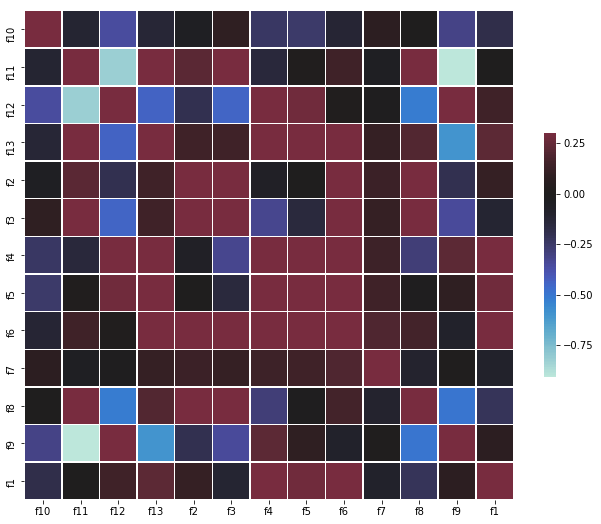

In [373]:
# Compute the correlation matrix
tmp_data = tdiv_btc.reset_index()
corr = tmp_data.loc[1:,].corr()

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Once we apply the division of the features by the total number of tweets the result appear less correlated, which is good.

### Crypto currencies prices

In [374]:
db_cryptos = sqlite3.connect('../cryptos.db')

query = "SELECT * FROM cryptos"
data_cryptos = pd.read_sql_query(query,db_cryptos)
data_cryptos['date'] = pd.to_datetime(data_cryptos['date'])
data_cryptos.set_index('date', inplace=True)
data_cryptos.sort_index(inplace=True)
data_cryptos.head()

,symbol,price,volume,market_cap
date,,,,
2018-03-21 22:40:00,LTC,166.850046,605492.007605,1.010264e+08
2018-03-21 22:40:00,BTC,8894.998570,101859.020921,9.060358e+08
2018-03-21 22:40:00,ETH,559.530318,480512.619368,2.688614e+08
2018-03-21 22:45:00,ETH,560.665817,480794.207013,2.695649e+08
2018-03-21 22:45:00,LTC,167.645108,606796.577486,1.017265e+08


In [375]:
crypto_btc = data_cryptos[data_cryptos['symbol'] == 'BTC']
crypto_btc = crypto_btc.resample('1H').median()
crypto_eth = data_cryptos[data_cryptos['symbol'] == 'ETH']
crypto_eth = crypto_eth.resample('1H').median()
crypto_ltc = data_cryptos[data_cryptos['symbol'] == 'LTC']
crypto_ltc = crypto_ltc.resample('1H').median()

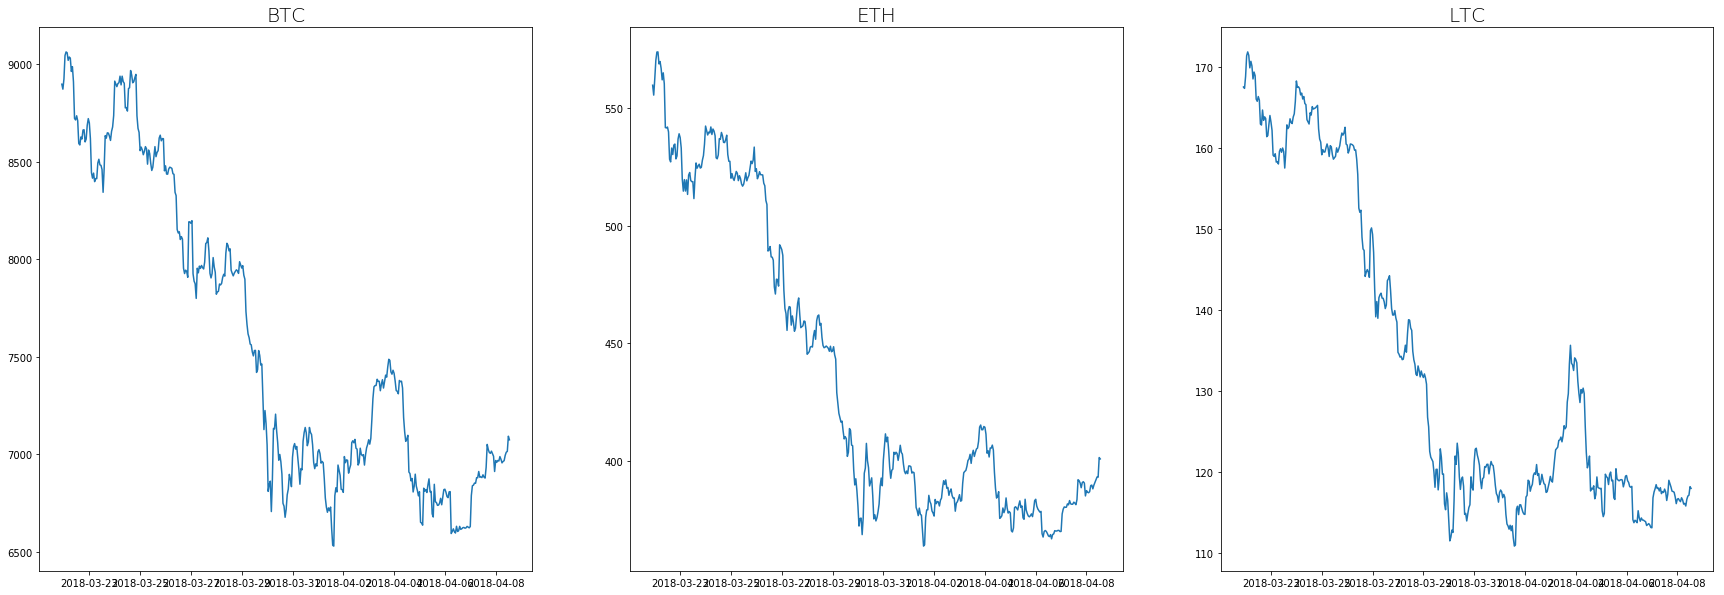

In [376]:
fig = plt.figure(figsize=(30,10))

title_font = {
    'fontsize': 20,
    'fontweight' : 10,
    'verticalalignment': 'baseline'
}


ax1 = fig.add_subplot(131)
ax1.plot('price', data=crypto_btc)
ax1.set_title(
    'BTC', fontdict=title_font)

ax2 = fig.add_subplot(132)
ax2.plot('price', data=crypto_eth)
ax2.set_title('ETH',fontdict=title_font)

ax3 = fig.add_subplot(133)
ax3.plot('price', data=crypto_ltc)
ax3.set_title('LTC',fontdict=title_font)

plt.show()

In [377]:
# price difference between subsequent entries
crypto_btc['diff'] = crypto_btc['price'].diff().dropna()
crypto_eth['diff'] = crypto_eth['price'].diff().dropna()
crypto_ltc['diff'] = crypto_ltc['price'].diff().dropna()

# price % difference between subsequent entries
crypto_btc['var'] = crypto_btc['price'].pct_change().dropna()
crypto_eth['var'] = crypto_eth['price'].pct_change().dropna()
crypto_ltc['var'] = crypto_ltc['price'].pct_change().dropna()

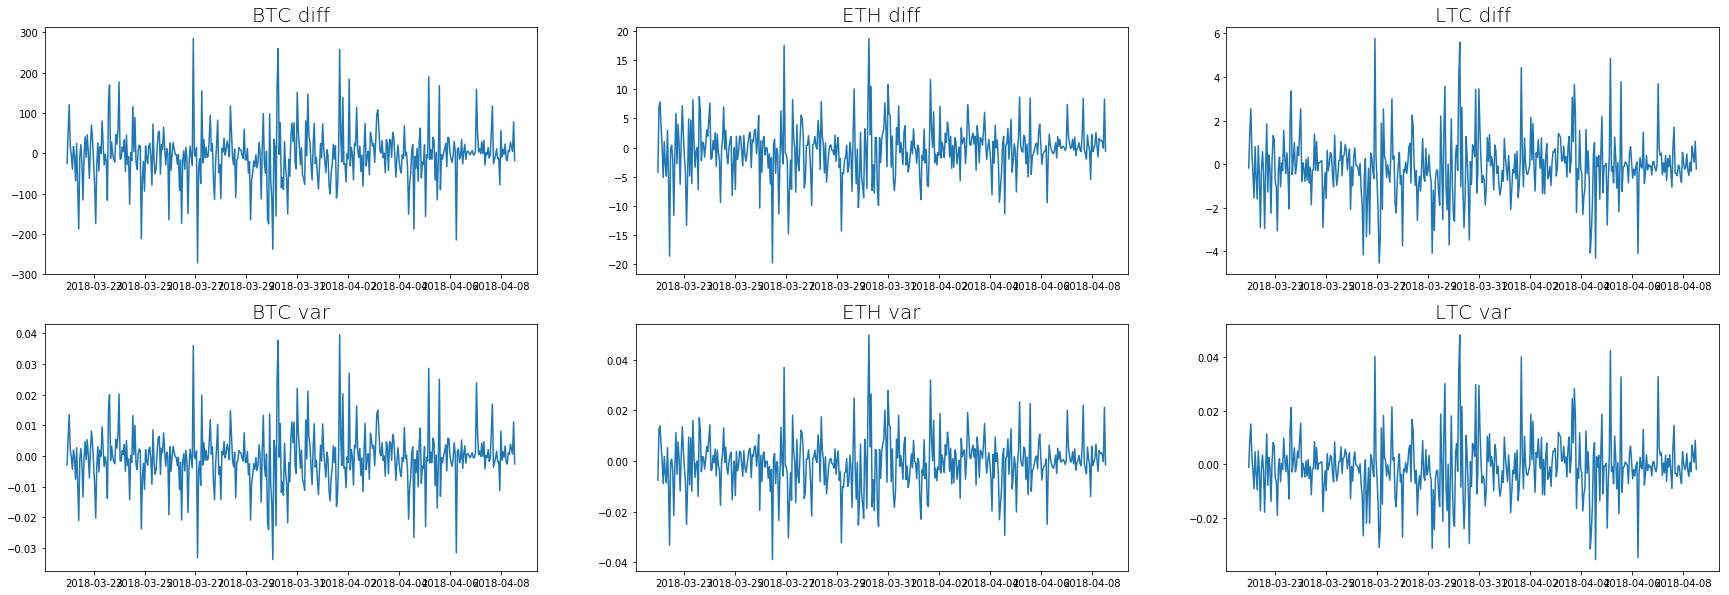

In [378]:
fig = plt.figure(figsize=(30,10))

title_font = {
    'fontsize': 20,
    'fontweight' : 10,
    'verticalalignment': 'baseline'
}


ax1 = fig.add_subplot(231)
ax1.plot('diff', data=crypto_btc)
ax1.set_title('BTC diff', fontdict=title_font)

ax2 = fig.add_subplot(232)
ax2.plot('diff', data=crypto_eth)
ax2.set_title('ETH diff',fontdict=title_font)

ax3 = fig.add_subplot(233)
ax3.plot('diff', data=crypto_ltc)
ax3.set_title('LTC diff',fontdict=title_font)

ax4 = fig.add_subplot(234)
ax4.plot('var', data=crypto_btc)
ax4.set_title('BTC var', fontdict=title_font)

ax5 = fig.add_subplot(235)
ax5.plot('var', data=crypto_eth)
ax5.set_title('ETH var', fontdict=title_font)

ax6 = fig.add_subplot(236)
ax6.plot('var', data=crypto_ltc)
ax6.set_title('LTC var', fontdict=title_font)

plt.show()

## Regression and classification

In [379]:
idx = pd.date_range(min(tdiv_btc.index), max(tdiv_btc.index), freq='1H')
filled_btc = tdiv_btc.reindex(idx, method='nearest')

filled_btc.head()

,f10,f11,f12,f13,f2,f3,f4,f5,f6,f7,f8,f9,f1
2018-03-23 14:00:00,0.103276,0.599944,0.196002,0.264298,0.224597,0.181288,0.454747,0.300111,0.157135,0.024708,0.574958,0.296780,3602
2018-03-23 15:00:00,0.108798,0.603109,0.185124,0.276714,0.239800,0.176520,0.454344,0.294477,0.147100,0.023314,0.611157,0.288093,3603
2018-03-23 16:00:00,0.100149,0.605680,0.183857,0.275037,0.236173,0.160538,0.428102,0.295665,0.154559,0.023318,0.617339,0.294170,3345
2018-03-23 17:00:00,0.121276,0.612398,0.176046,0.274752,0.242853,0.163106,0.448992,0.291303,0.163707,0.031297,0.626843,0.266326,3323
2018-03-23 18:00:00,0.111213,0.616392,0.166971,0.278184,0.202316,0.172151,0.438452,0.269957,0.134979,0.020414,0.614260,0.272395,3282


In [380]:
filled_btc.dtypes

f10    float64
f11    float64
f12    float64
f13    float64
f2     float64
f3     float64
f4     float64
f5     float64
f6     float64
f7     float64
f8     float64
f9     float64
f1       int64
dtype: object

In [381]:
frame_length = 30
shifted_list = [filled_btc.shift(i).add_suffix('_{}'.format(i)) for i in range(frame_length)]

delayed_btc = pd.concat(shifted_list, axis=1)
full_df = pd.concat([delayed_btc,crypto_btc],axis=1).dropna()

full_df.columns[:-5]

Index(['f10_0', 'f11_0', 'f12_0', 'f13_0', 'f2_0', 'f3_0', 'f4_0', 'f5_0',
       'f6_0', 'f7_0',
       ...
       'f13_29', 'f2_29', 'f3_29', 'f4_29', 'f5_29', 'f6_29', 'f7_29', 'f8_29',
       'f9_29', 'f1_29'],
      dtype='object', length=390)

### Linear regression

In [382]:
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split

In [383]:
# regressors and output var
X = full_df[full_df.columns[:-5]].values
y = full_df['var'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [384]:
(F, p_val) = f_regression(X,y)

Manual feature selection

In [385]:
# confidence level
alpha = 0.01
# statistically significant regressors
regr_index = p_val < alpha
regr_names = full_df.columns[:-5][regr_index]
regr_values = p_val[regr_index]

# show significant features with corresponding pvalue
regr_df = pd.DataFrame(index=regr_names, columns=['p_val'])
regr_df['p_val'] = regr_values
regr_df.sort_values(by=['p_val'], ascending=True)

,p_val
f2_24,0.000359
f6_11,0.003947
f7_29,0.004635
f10_17,0.006714
f2_8,0.007455


Automatic feature selection with **SelectKBest**

In [386]:
from sklearn.feature_selection import SelectKBest

In [387]:
X = full_df[full_df.columns[:-5]]
y = full_df['var']
X_new = SelectKBest(f_regression, k=5).fit(X1, y1)
selected_feat = full_df.columns[:-5][X_new.get_support()]
selected_feat

Index(['f2_8', 'f6_11', 'f10_17', 'f2_24', 'f7_29'], dtype='object')

Gives the same result as the manual process. Now that we have the features, let's restrict the dataframe keeping only the useful features.

In [388]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [389]:
# dataframe with useful features
small_df = full_df[selected_feat]
# split training and set
X = small_df.values
y = full_df['var'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.5f"
      % mean_squared_error(y_test, y_pred, multioutput='raw_values'))
# Explained variance score: 1 is perfect prediction
print('R^2: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.04212943  0.04638008  0.01512839  0.03758726  0.20798029]
Mean squared error: 0.00010
R^2: 0.14


By changing the test, training set the $R^2$ slightly changes. Mean squared error is always extremely low. Overall the model seems very bad, given the extremely low value of $R^2$

### Logistic regression
Binary classification route. Class is +1 if the price % difference is positive (price has increased from the previous time slot), -1 if the price has decreased.

In [390]:
full_df['class'] = full_df['var'].where(full_df['var'] > 0, -1)
full_df['class'] = full_df['class'].where(full_df['class'] < 0, 1)

In [391]:
logreg = linear_model.LogisticRegression(C=1e5)

X2 = full_df[full_df.columns[:-5]].values
X2 = small_df.values
y = full_df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test, sample_weight=None)

0.63380281690140849

### Decision trees

In [392]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.45070422535211269

### Various

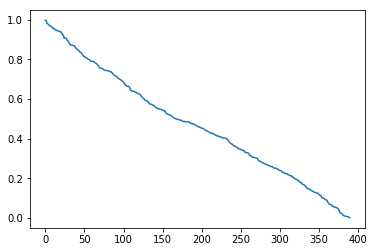

In [26]:
plt.plot(sorted(p_val,reverse=True))
plt.show()

In [27]:
import fnmatch

In [28]:
byfeat_pval = np.zeros(len(filled_btc.columns))
for i,feat in enumerate(filled_btc.columns):
    byfeat_pval[i] = p_val[[fnmatch.fnmatch(col, "{}_*".format(feat)) for col in delayed_btc.columns]].mean()

byfeat_pval

array([ 0.50787762,  0.52048139,  0.47187927,  0.40876626,  0.35145055,
        0.45908039,  0.49029675,  0.54680859,  0.45874523,  0.41437544,
        0.45875706,  0.46290625,  0.58251005])

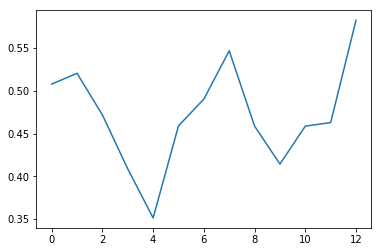

In [29]:
plt.plot(byfeat_pval)
plt.show()

In [30]:
bydel_pval = np.zeros(frame_length)
for i in range(frame_length):
    bydel_pval[i] = p_val[[fnmatch.fnmatch(col, "*_{}".format(i).format(feat)) for col in delayed_btc.columns]].mean()

bydel_pval

array([ 0.42098287,  0.55382425,  0.46564525,  0.51578312,  0.62186159,
        0.62275416,  0.57416528,  0.55147469,  0.48285698,  0.38294798,
        0.38068524,  0.2985186 ,  0.30493582,  0.37087446,  0.31049751,
        0.45557009,  0.45895954,  0.4242635 ,  0.54001754,  0.53983806,
        0.59716668,  0.5744793 ,  0.50853823,  0.47699355,  0.43954312,
        0.41528911,  0.29508058,  0.47217615,  0.62806181,  0.47144923])

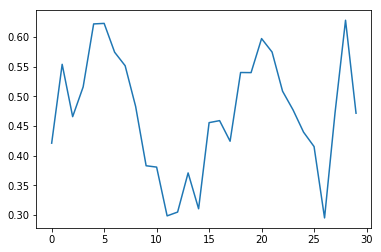

In [165]:
plt.plot(bydel_pval)
plt.show()